### Rudimentary image segmentation algorithm

In [1]:
import skimage.color as color
import cv2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from skimage import io
import skimage.color as color
import string
from numpy.random import default_rng

In [3]:
def init_X(Nx,Ny):
    X0 = np.random.choice([1, -1], size=(Nx, Ny))
    return X0


def deltaJ(xi, Sxj, cij, theta, bi):
    return 2 * xi * (theta * bi + cij * Sxj)


def metropolis(c, theta, b, T, niter=500000):
    Nx,Ny = b.shape
    N = Nx*Ny
    X = np.sign(b)
    energy = 0
    energies = []
    ie = []
    spins = []
    spin = np.sum(X)
    isp = []

    for n in range(niter):

        i = np.random.randint(N)
        y = np.mod(i, Ny)
        x = i // Ny

        # Periodic Boundary Condition
        Sxj = X[(x - 1) % Nx, y] + X[(x + 1) % Nx, y] + \
              X[x, (y - 1) % Ny] + X[x, (y + 1) % Ny]

        dJ = deltaJ(X[x, y], Sxj, c, theta, b[x,y])

        if dJ < 0 or np.random.random() < np.exp(-dJ/T):
            X[x, y] = -X[x, y]
            energy += dJ
            energies.append(energy)
            ie.append(n)
            spin += 2*X[x, y]

        if n % 10000 == 0:
            spins.append(spin)
            isp.append(n)

    return X, energies, spins, ie, isp

In [ ]:
ast = list(string.ascii_lowercase)
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({"font.size": 8})
plt.rcParams.update({'axes.titlesize': 'medium'})
niter = int(3e6)
np.random.seed(1)
im = cv2.imread('heraldic_inv.png')
imgray= cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
imid = .5*(imgray.max()+imgray.min())
b = 2*(imgray-imid)/(imgray.max()-imgray.min())
Nx,Ny=b.shape
print(f'{b.shape} {b.min()} {b.max()}')
plt.imshow(b,cmap='gray')
plt.show()
temperatures = [1,1.76,2]
thetas = [0.05,3]
fig,ax = plt.subplots(2,1,figsize=(5.6, 4.5),sharex=True)
Xall = []
for i,T in enumerate(temperatures):

    X, energies, spins, ie, isp = metropolis(1, 0.5, b, T=T, niter = niter)
    Xall.append(X)
    print(len(ie)/niter)
    spins = np.array(spins) / (Nx*Ny)
    ax[0].plot(isp, spins, label = r'$T = {0}$'.format(T))
    ax[1].plot(ie, energies, label = r'$T = {0}$'.format(T))
    if i==1:
        ref = [isp, spins, ie, energies]
ax[0].legend(loc = 'best')
ax[1].set_xlabel('nSteps')
ax[0].set_ylabel('average spin')
ax[1].set_ylabel('energy')
ax[0].set_title(f'(a)', loc="left")
ax[1].set_title(f'(b)', loc="left")
plt.tight_layout()
#plt.savefig('spn_egy_T.pdf', bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(2,1,figsize=(5.6, 4.5),sharex=True)
for i,th in enumerate(thetas):
    if i:
        ax[0].plot(ref[0], ref[1], label = r'$\theta = 0.5$')
        ax[1].plot(ref[2], ref[-1])

    X, energies, spins, ie, isp = metropolis(1, th, b, T=1.76, niter = niter)
    Xall.append(X)
    spins = np.array(spins) / (Nx*Ny)

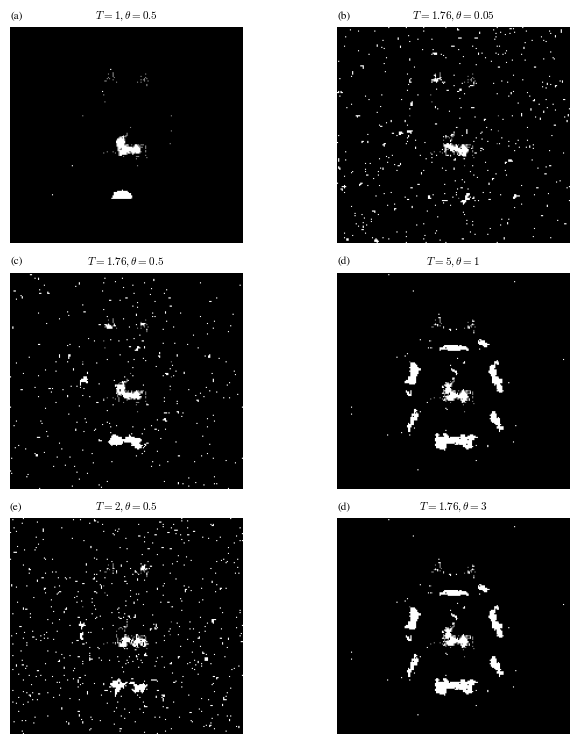

In [ ]:
fig,ax = plt.subplots(3,2,figsize=(190/25.4, 190/25.4),sharex=True,sharey=True)
for i,T in enumerate(temperatures):
    ax[i,0].imshow(Xall[i],cmap='gray')
    ax[i,0].axis('off')
    ax[i,0].set_title(f'$T={temperatures[i]},'+r'\theta=0.5$')
    ax[i,0].set_title(f'({ast[2*i]})', loc="left")
ax[1,1].imshow(Xall[-1],cmap='gray')
ax[1,1].axis('off')
ax[1,1].set_title(r'$T=5,\theta=1$')
ax[1,1].set_title(f'({ast[3]})', loc="left")
for i,th in enumerate(thetas):
    ax[2*i,1].imshow(Xall[i+3],cmap='gray')
    ax[2*i,1].axis('off')
    ax[2*i,1].set_title(r'$T=1.76,\theta='+f'{th}$')
    ax[2*i,1].set_title(f'({ast[2*i+1]})', loc="left")
plt.tight_layout()
plt.savefig('segment.pdf', bbox_inches='tight')
plt.show()